In [1]:
# 📌 Upload the file
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic.csv


In [3]:
# 📌 Load and preprocess
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

X = df.drop('survived', axis=1)
y = df['survived']

# Encode all categorical columns
X_encoded = X.apply(LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



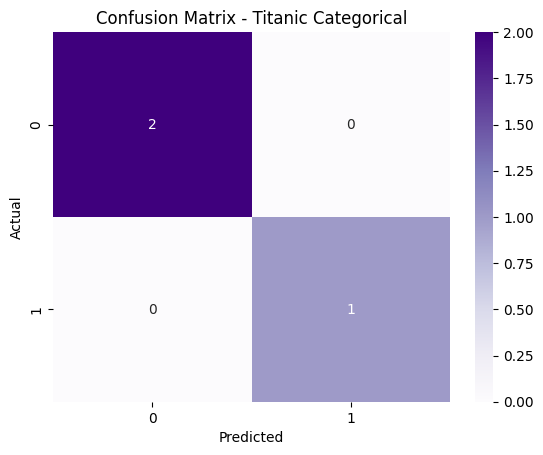

In [4]:
# 📌 Train and evaluate CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Titanic Categorical")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
